# Машинное обучение
# Лабораторная работа №3
## Ширшов Алексей 19-ИВТ-2
### Вариант 8

Задание: "Зоопарк"

Цель лабораторной работы – получение навыков работы с методами классификации.
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Кодировка классификаторов:
1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);
2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
3 – линейный классификатор (персептрон);
4 – логический классификатор (бинарное решающее дерево).

Набор данных: 3
Классификатор: 2, 3

In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score

In [19]:
zoo_df = pd.read_csv('zoo.csv')
zoo_df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [20]:
class_df = pd.read_csv('class.csv')
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

**Цель этого набора данных - иметь возможность предсказать классификацию животных на основе переменных.**

Описание файла zoo.csv

|Название атрибута|Описание на русском|Тип атрибута|
|---:|---:|---:|
|animal_name|Название животного|Строчный|
|hair|Наличие волосяного покрова|Бинарный|
|feathers|Наличие перьев|Бинарный|
|eggs|Откладывает яйца|Бинарный|
|milk|Млекопитающее|Бинарный|
|airborne|Летающий вид|Бинарный|
|aquatic|Морской вид|Бинарный|
|predator|Хищный вид|Бинарный|
|toothed|Наличие зубов|Бинарный|
|backbone|Позвоночное|Бинарный|
|breathes|Способность к дыханию|Бинарный|
|venomous|Ядовитое|Бинарный|
|fins|Наличие плавников|Бинарный|
|legs|Количество ног|Числа из массива {0,2,4,5,6,8}|
|tail|Наличие хвоста|Бинарный|
|domestic|Домашнее|Бинарный|
|catsize|Размер кошки|Бинарный|
|class_type|Номер класса|Целые числа в диапазоне [1, 7]|

Описание файла class.csv

|Название атрибута|Перевод на русский|Тип атрибута|
|---:|---:|---:|
|Class_Number|Номер класса|Целые числа в диапазоне [1, 7]|
|Number_Of_Animal_Species_In_Class|Кол-во животных в классе|Целочисленный|
|Class_Type|Описание класса|Строчный|
|Animal_Names|Названия животных|Строчный|

Представлены следующие классы:
1. Млекотопитающие
2. Птицы
3. Рептилии
4. Рыбы
5. Амфибии
6. Насекомые
7. Беспозвоночные

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [21]:
print("Изначальный кол-во строк до удаления дубликатов строк:", zoo_df.shape)
zoo_without_dupl_df = zoo_df.drop_duplicates()
print("Изначальный кол-во строк до удаления дубликатов строк:", zoo_without_dupl_df.shape)
zoo_without_dupl_df

Изначальный кол-во строк до удаления дубликатов строк: (101, 18)
Изначальный кол-во строк до удаления дубликатов строк: (101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:xlabel='class_type'>

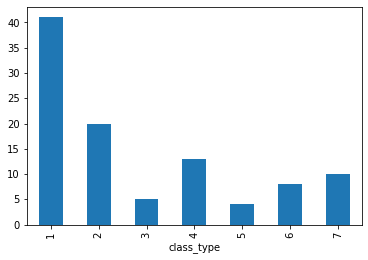

In [22]:
zoo_df.groupby(['class_type'])['class_type'].count().plot(kind='bar')

По гистограмме видно, что есть несбалансированность классов: больше всего животных в классе 1 (млекотопитающие), остальные классы тоже не сбалансированы.
В таком случае лучше использовать PR-кривую, потому что она хорошо подходит для измерения качества при сильном дисбалансе классов

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [23]:
# выделим категориальные и количественные признаки
numerical_columns  = [i for i in zoo_df.columns if zoo_df[i].dtype.name != 'object']
categorial_columns = [i for i in zoo_df.columns if zoo_df[i].dtype.name == 'object']

print('Категориальные признаки:', categorial_columns)
print('Количественные признаки:', numerical_columns)

Категориальные признаки: ['animal_name']
Количественные признаки: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


In [24]:
# class_type по сути является категориальным признаком, а не количественным
# так что поменяем его тип с целочисленного на строчный

zoo_df['class_type'] = zoo_df['class_type'].apply(lambda x: str(x))\

# так же удалим столбец с названиями животных, т.к. они не коррелируют с другими признаками
zoo_df = zoo_df.drop('animal_name', axis=1)

# снова выделим категориальные и количественные признаки
numerical_columns  = [i for i in zoo_df.columns if zoo_df[i].dtype.name != 'object']
categorial_columns = [i for i in zoo_df.columns if zoo_df[i].dtype.name == 'object']

print('Категориальные признаки:', categorial_columns)
print('Количественные признаки:', numerical_columns)

Категориальные признаки: ['class_type']
Количественные признаки: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


<AxesSubplot:>

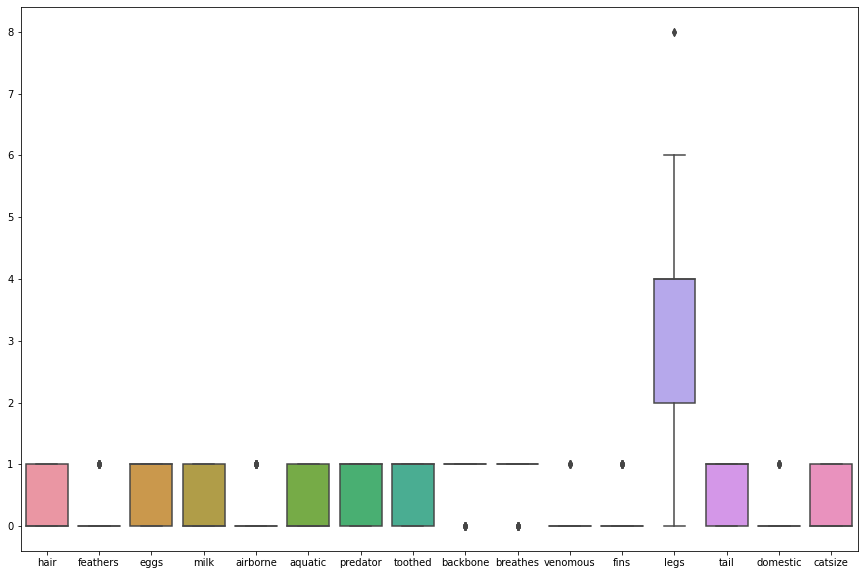

In [25]:
# Диаграмма до масштабирования
plt.figure(figsize=(15,10))
sns.boxplot(data=zoo_df[numerical_columns])

<AxesSubplot:>

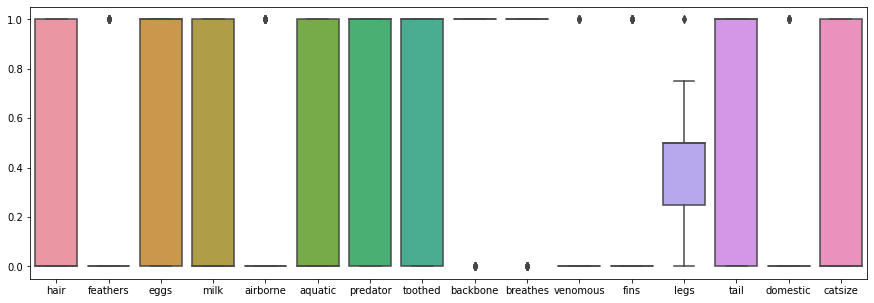

In [26]:
# нормализуем количественные признаки
scaler = preprocessing.MinMaxScaler()
zoo_df[numerical_columns] = scaler.fit_transform(zoo_df[numerical_columns])

# Диаграмма после масштабирования
plt.figure(figsize=(15,5))
sns.boxplot(data=zoo_df[numerical_columns])

### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [27]:
# будем использовать dummy-кодирование
zoo_df_dummy = pd.get_dummies(zoo_df[categorial_columns])

# Добавим в одну таблицу преобразованные количественные и категориальные признаки
zoo_df = pd.concat([zoo_df_dummy, zoo_df[numerical_columns]] , axis=1)
zoo_df

,class_type_1,class_type_2,class_type_3,class_type_4,class_type_5,class_type_6,class_type_7,hair,feathers,eggs,...,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1,0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0,0,0,1,0,0,0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,0,0,0,0,0,1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0,0,0,0,0,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

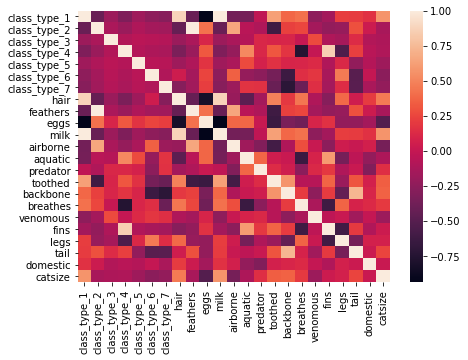

In [28]:
plt.figure(figsize=(7, 5))
sns.heatmap(zoo_df.corr())

### 7. Заполните пропущенные значения в данных;

In [29]:
zoo_df.isnull().sum()

class_type_1    0
class_type_2    0
class_type_3    0
class_type_4    0
class_type_5    0
class_type_6    0
class_type_7    0
hair            0
feathers        0
eggs            0
milk            0
airborne        0
aquatic         0
predator        0
toothed         0
backbone        0
breathes        0
venomous        0
fins            0
legs            0
tail            0
domestic        0
catsize         0
dtype: int64

Пропущенных значений в данных нет

### 8. Решите поставленную задачу классификации в соответствии с заданием.

In [30]:
# разделим полученные данные на данные для обучения и теста
X, y = zoo_df.drop('venomous', axis=1), zoo_df['venomous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

print(X_train.shape)
print(X_test.shape)

(70, 22)
(31, 22)


#### Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)

In [31]:
# найдем оптимальный радиус для классификатора ближайших соседей
rnc = RadiusNeighborsClassifier(outlier_label=1)

params = {'radius': np.arange(0, 5, 0.1)}

rnc_grid = GridSearchCV(rnc, params, n_jobs=-1)
rnc_grid.fit(X_train, y_train)
best_radius = rnc_grid.best_estimator_.radius
best_accuracy = rnc_grid.best_score_
print('Best accuracy:', best_accuracy, 'radius: %.2f' %(best_radius))


rnc = RadiusNeighborsClassifier(outlier_label=1, radius=best_radius, n_jobs=-1)
rnc.fit(X_train, y_train)
pred = rnc.predict(X_test)
print("Accuracy:", sk.metrics.accuracy_score(y_test, pred))
print("Test labels :\n", list(y_test))
print("Predicted labels:", pred)

Best accuracy: 0.9285714285714286 radius: 1.80
Accuracy: 0.9354838709677419
Test labels :
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predicted labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


#### Линейный классификатор (персептрон)

In [32]:
perc = Perceptron()

params = {'alpha': np.linspace(0, 1, 20),
          'max_iter': [x for x in range(1, 20)]}

perc_grid = GridSearchCV(estimator=perc, param_grid=params, n_jobs=-1)
perc_grid.fit(X_train, y_train)
best_score = perc_grid.best_score_
selected_alpha = perc_grid.best_estimator_.alpha
selected_max_iter = perc_grid.best_estimator_.max_iter
print('best score:', best_score)
print('alpha:', selected_alpha)
print('max_iter:', selected_max_iter)

net = Perceptron(alpha=selected_alpha, max_iter=selected_max_iter, penalty='l2', n_jobs=-1)
net.fit(X_train, y_train)
print('The accuracy of the classifier on training data %.3f' %(net.score(X_train,y_train)))
print('The accuracy of the classifier on test data %.3f' %(net.score(X_test,y_test)))
print(net.coef_)

best score: 0.9285714285714285
alpha: 0.0
max_iter: 14
The accuracy of the classifier on training data 0.943
The accuracy of the classifier on test data 0.935
[[-5.   -3.    1.    1.    3.    2.    0.    3.   -3.   -6.   -5.    2.
   1.    2.    0.   -3.   -1.    0.    1.25  0.    2.   -1.  ]]


In [33]:
from sklearn.calibration import CalibratedClassifierCV
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
    
probas_rnc = rnc.fit(X_train, y_train).predict_proba(X_test)

net_sigmoid = CalibratedClassifierCV(net, cv=5, method='sigmoid', n_jobs=-1)
net_sigmoid.fit(X_train, y_train)
probas_net = net_sigmoid.predict_proba(X_test)

#### PR-кривая

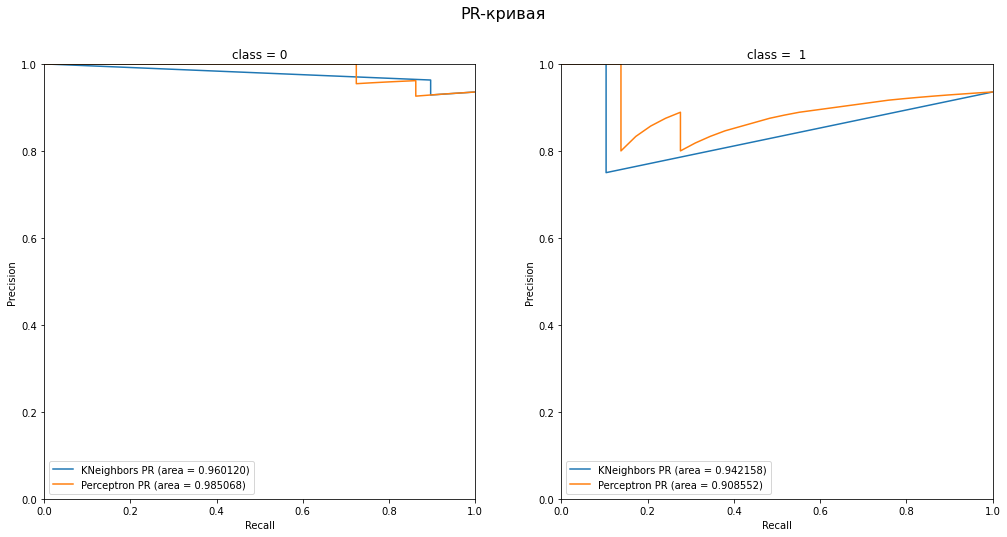

In [34]:
fig, (ax_0, ax_1) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(17, 8)
)     

# Классификатор К ближайших соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_rnc[:,0])
ap_rnc_0 = average_precision_score(y_test_invers, probas_rnc[:,0])
ax_0.plot(recall, precision, label='KNeighbors PR (area = %f)' %(ap_rnc_0)) 

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_rnc[:,1])
ap_rnc_1 = average_precision_score(y_test_invers, probas_rnc[:,1])
ax_1.plot(recall, precision, label='KNeighbors PR (area = %f)' %(ap_rnc_1)) 

# Линейный классификатор
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_net[:,0])
ap_net_0 = average_precision_score(y_test_invers,probas_net[:,0])
ax_0.plot(recall, precision, label='Perceptron PR (area = %f)' %(ap_net_0))

precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_net[:,1])
ap_net_1 = average_precision_score(y_test_invers,probas_net[:,1])
ax_1.plot(recall, precision, label='Perceptron PR (area = %f)' %(ap_net_1))

fig.suptitle('PR-кривая', fontsize=16)

# вывод графиков
ax_0.set_xlabel('Recall')
ax_0.set_ylabel('Precision')
ax_0.set_xlim([0.0, 1.0])
ax_0.set_ylim([0.0, 1.0])
ax_0.legend()
ax_0.set_title('class = 0')

ax_1.set_xlabel('Recall')
ax_1.set_ylabel('Precision')
ax_1.set_xlim([0.0, 1.0])
ax_1.set_ylim([0.0, 1.0])
ax_1.legend()
ax_1.set_title('class =  1')

plt.show()

#### ROC-кривая

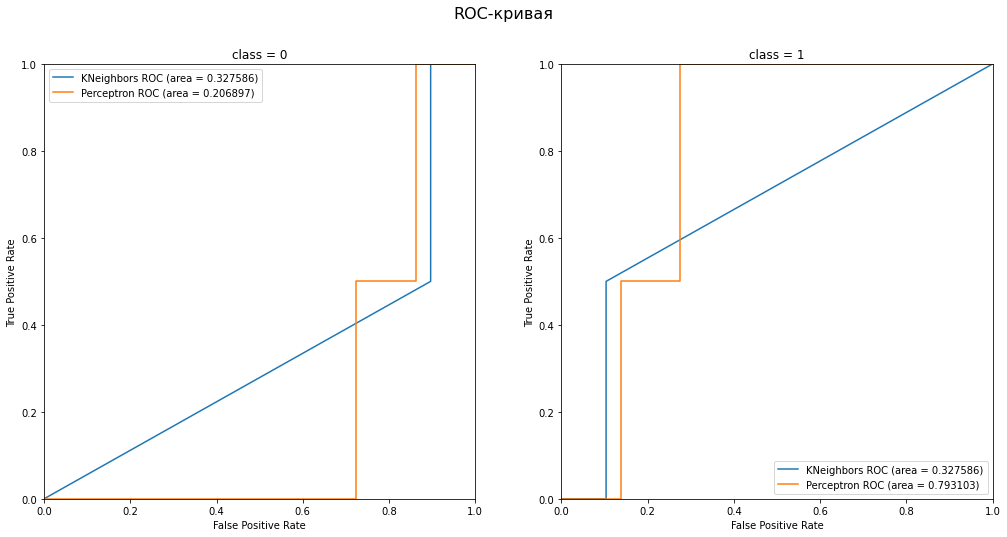

In [35]:
fig, (ax_0, ax_1) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(17, 8)
)     

# Классификатор К ближайших соседей
fpr, tpr, thresholds = roc_curve(y_test, probas_rnc[:,0])
roc_auc_0 = auc(fpr, tpr)
ax_0.plot(fpr, tpr, label='KNeighbors ROC (area = %f)' %(roc_auc_0)) 

fpr, tpr, thresholds = roc_curve(y_test, probas_rnc[:,1])
roc_auc_1 = auc(fpr, tpr)
ax_1.plot(fpr, tpr, label='KNeighbors ROC (area = %f)' %(roc_auc_0)) 

# Линейный классификатор
fpr, tpr, thresholds = roc_curve(y_test, probas_net[:,0])
roc_auc_0 = auc(fpr, tpr)
ax_0.plot(fpr, tpr, label='Perceptron ROC (area = %f)' %(roc_auc_0))

fpr, tpr, thresholds = roc_curve(y_test, probas_net[:,1])
roc_auc_1 = auc(fpr, tpr)
ax_1.plot(fpr, tpr, label='Perceptron ROC (area = %f)' %(roc_auc_1))

fig.suptitle('ROC-кривая', fontsize=16)

# вывод графиков
ax_0.set_xlabel('False Positive Rate')
ax_0.set_ylabel('True Positive Rate')
ax_0.set_xlim([0.0, 1.0])
ax_0.set_ylim([0.0, 1.0])
ax_0.legend()
ax_0.set_title('class = 0')

ax_1.set_xlabel('False Positive Rate')
ax_1.set_ylabel('True Positive Rate')
ax_1.set_xlim([0.0, 1.0])
ax_1.set_ylim([0.0, 1.0])
ax_1.legend()
ax_1.set_title('class = 1')

plt.show()

### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Наибольшую точность показывает линейный классификатор (персептрон), хотя и незначительно по сравнению с классификатором К ближайших соседей. Как уже было сказано ранее, из-за сильного дисбаланса классов лучше всего подошла PR-кривая.
В целом точность линейного классификатора и классификатора К ближайших соседей примерно равна 0.92, что далеко от 0.5. Значит задача классификации была решена